# <center>Sales Data Analysis</center>

<img src="https://www.saleshacker.com/wp-content/uploads/2017/05/sales-forecasting-metrics-1024x768.jpg"/>

## Introduction <a class="anchor" id="1st-bullet"></a>
Businesses need to comprehend sales data. We will delve deeply into this data to uncover crucial insights with the aid of exploratory data analysis, or EDA. We are going to examine this simple sales data in this study. Our mission is to uncover undiscovered knowledge that can boost profits and decision-making for businesses. We'll examine the data using EDA techniques to find important information that can help businesses succeed. Here we will use Pandas for data preprocessing and cleaning and will also use Matplotlib, Plotly, seaborn for visualizations. 

<a id = "table-of-content"></a>
## Table of Contents
- [Introduction](#1st-bullet)
- [Importing Necessary Libraries](#2nd-bullet)
- [Data Preprocessing & Cleaning](#3rd-bullet)
- [Data Analysis & Visualizations](#4th-bullet)
    - [Q1. Which Year Had The Most Sales?](#Q1)
    - [Q2. Which Month Had The Most Sales?](#Q2)
    - [Q3. Which Country Had The Most Sales?](#Q3)
    - [Q4. Which Country Had More Sales Growth?](#Q4)
    - [Q5. Which Item Had Sold The Most in 2004?](#Q5)
    - [Q6. Which Item Had Sold The Most in 2003?](#Q6)
    - [Q7. Who are the top 20% Customer?](#Q7)
    - [Q8. Which Amount of Revenue is Contributed by The Top 20% of Customers?](#Q8)

## Importing Necessary Libraries <a class="anchor" id="2nd-bullet"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## <center>Data Preprocessing & Cleaning <a class="anchor" id="3rd-bullet"></a>

In [2]:
df=pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv',index_col='ORDERNUMBER',encoding='Latin-1')
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.reset_index(inplace=True)

In [4]:
df.shape

(2823, 25)

In [5]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['ORDERNUMBER','PRICEEACH','ORDERLINENUMBER','ORDERDATE','STATUS','QTR_ID','PRODUCTCODE','PHONE','ADDRESSLINE2','STATE',
           'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], axis=1, inplace=True)

In [10]:
df.shape

(2823, 11)

In [11]:
df.sample(5)

,QUANTITYORDERED,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,DEALSIZE
2149,26,2829.58,7,2003,Trucks and Buses,96,Technics Stores Inc.,9408 Furth Circle,Burlingame,USA,Small
2297,31,3139.99,11,2004,Trucks and Buses,64,"Corrida Auto Replicas, Ltd","C/ Araquil, 67",Madrid,Spain,Medium
1221,48,5386.56,11,2003,Vintage Cars,105,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,France,Medium
198,44,10606.20,5,2004,Classic Cars,207,Suominen Souveniers,"Software Engineering Center, SEC Oy",Espoo,Finland,Large
1219,29,3622.97,10,2003,Vintage Cars,105,"Toys of Finland, Co.",Keskuskatu 45,Helsinki,Finland,Medium


## <center>Data Analysis & Visualization</center> <a class="anchor" id="4th-bullet"></a>

### Q1. Which Year Had The Most Sales? <a class="anchor" id="q1"></a>

In [12]:
df1 = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
df1.head()

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


Text(0.5, 1.0, 'Sales vs Year')

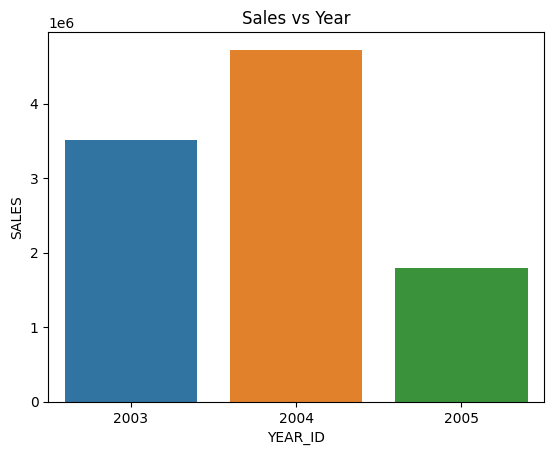

In [13]:
sns.barplot(data=df1, y='SALES', x='YEAR_ID')
plt.title('Sales vs Year')

##### This shows that, out of the three years, 2004 had the highest revenue; however, the data for 2005 is limited to five months.

### Q2. Which Month Had The Most Sales? <a class="anchor" id="q2"></a>

In [14]:
df2 = df.groupby('MONTH_ID')['SALES'].sum().reset_index()
df2.head()

,MONTH_ID,SALES
0,1,785874.44
1,2,810441.90
2,3,754501.39
3,4,669390.96
4,5,923972.56


Text(0.5, 1.0, 'Sales vs Month')

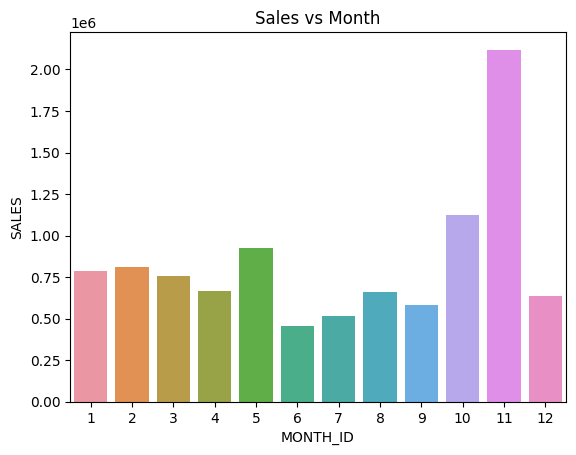

In [15]:
sns.barplot(data=df2, y='SALES', x='MONTH_ID')
plt.title('Sales vs Month')

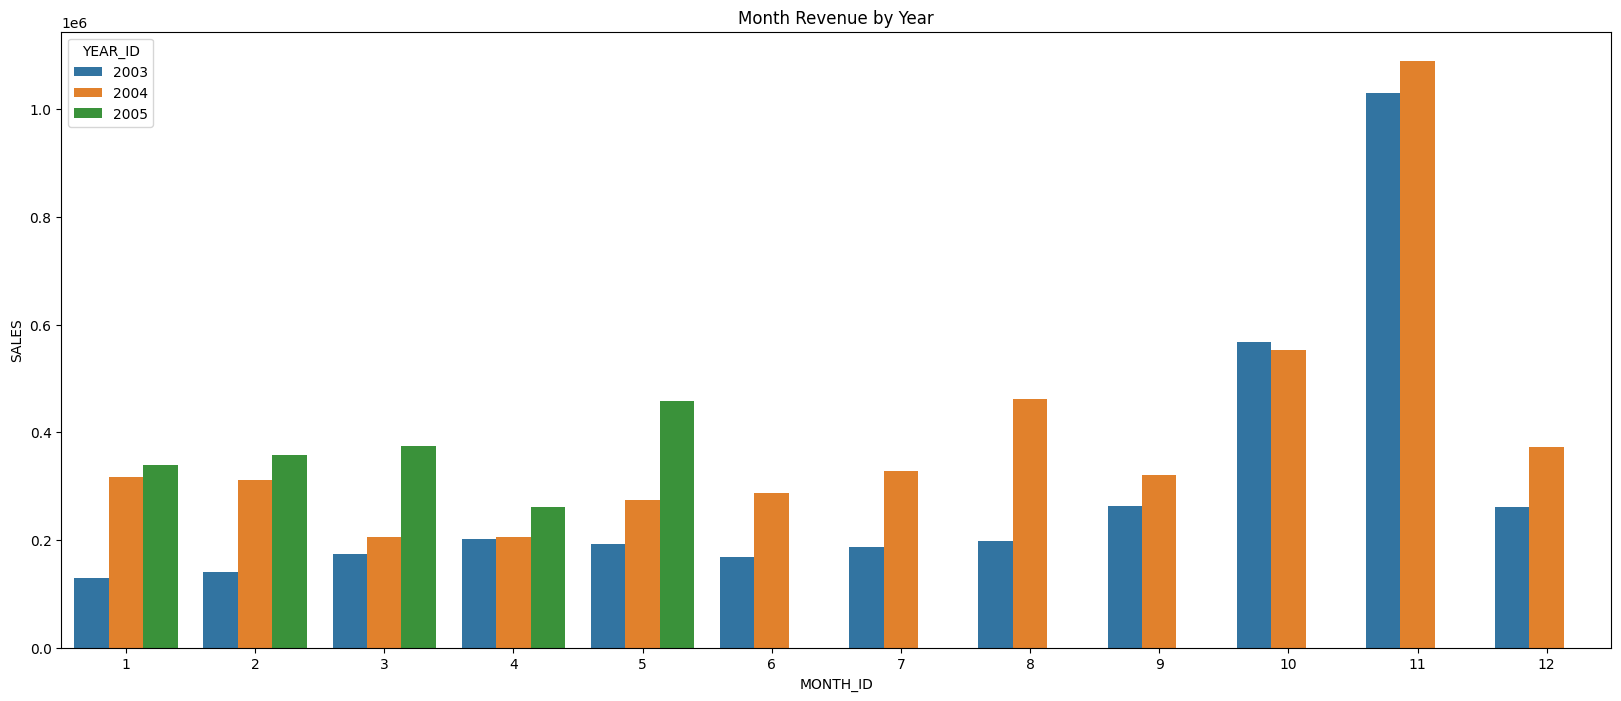

In [16]:
unique_months = df['MONTH_ID'].unique()
temp=pd.DataFrame()
# Create subplots for each year
for i, month in enumerate(unique_months):
    month_data = df[df['MONTH_ID'] == month]
    month_data=month_data.groupby('YEAR_ID')['SALES'].sum().reset_index()
    month_data['MONTH_ID'] = month
    temp = pd.concat([temp,month_data], ignore_index=True)
plt.figure(figsize=(20,8))
plt.title("Month Revenue by Year") # add title 
a= sns.barplot(x='MONTH_ID',y='SALES',data=temp,hue='YEAR_ID')
plt.xticks()
plt.show()

##### November was the month with the highest revenue. We also observe that the revenue was rising annually in this case. Compared to 2004, revenue increased in the first five months of 2005. Thus, if we had enough information, we could conclude that 2005 was likely the year with the highest revenue.

### Q3. Which Country Had The Most Sales? <a class="anchor" id="q3"></a>

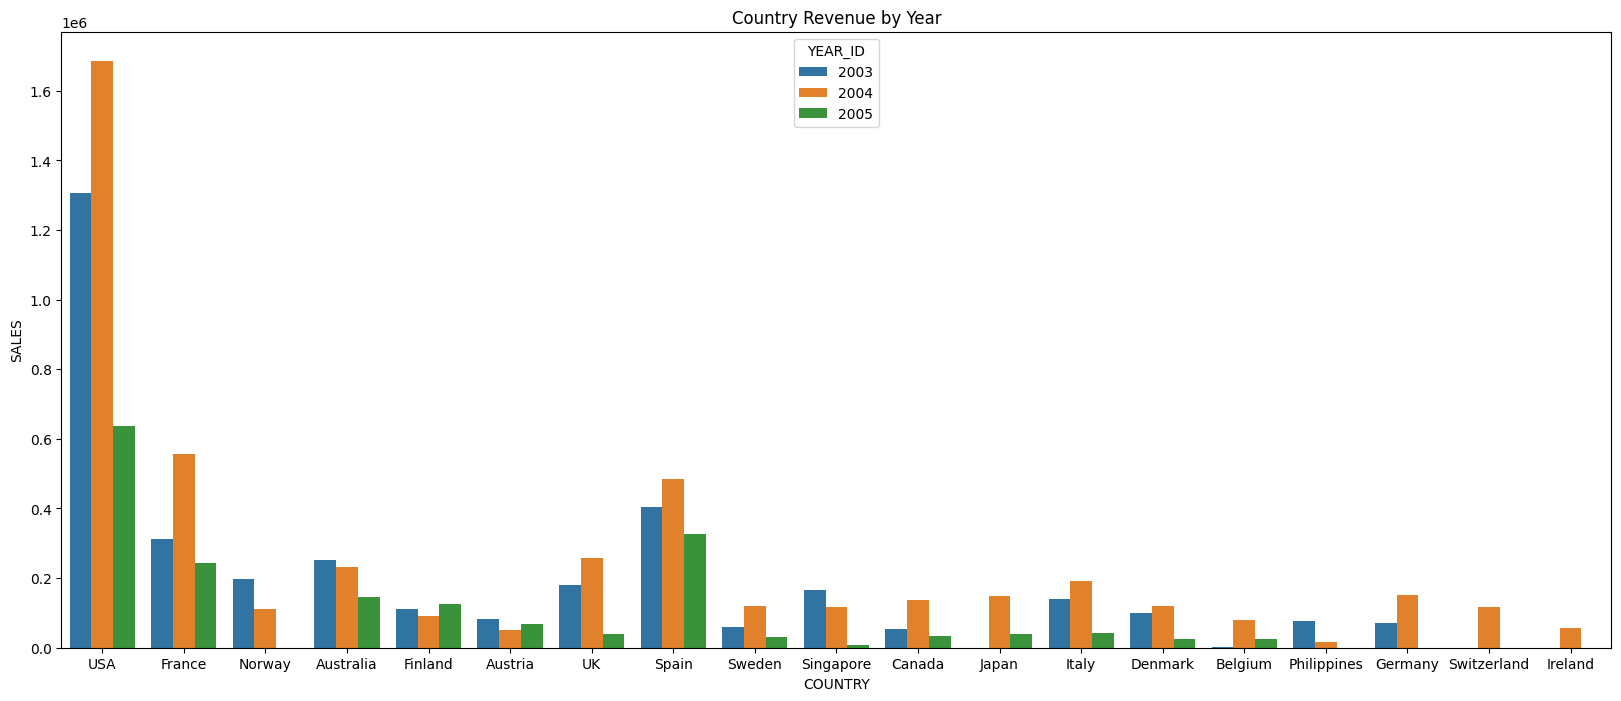

In [17]:
unique_countries = df['COUNTRY'].unique()
temp=pd.DataFrame()
# Create subplots for each year
for i, country in enumerate(unique_countries):
    country_data = df[df['COUNTRY'] == country]
    country_data=country_data.groupby('YEAR_ID')['SALES'].sum().reset_index()
    country_data['COUNTRY'] = country
    temp = pd.concat([temp,country_data], ignore_index=True)
plt.figure(figsize=(20,8))
plt.title("Country Revenue by Year") # add title 
a= sns.barplot(x='COUNTRY',y='SALES',data=temp,hue='YEAR_ID')
plt.xticks()
plt.show()

### Q4. Which Country Had More Sales Growth? <a class="anchor" id="q4"></a>

In [18]:
unique_countries = df['COUNTRY'].unique()
temp=pd.DataFrame()
# Create subplots for each year
for i, country in enumerate(unique_countries):
    country_data = df[df['COUNTRY'] == country]
    country_data=country_data.groupby('YEAR_ID')['SALES'].sum().reset_index()
    country_data['COUNTRY'] = country
    temp = pd.concat([temp,country_data], ignore_index=True)
temp.head()

,YEAR_ID,SALES,COUNTRY
0,2003,1305147.88,USA
1,2004,1685470.69,USA
2,2005,637364.26,USA
3,2003,312761.42,France
4,2004,555198.70,France


In [19]:
temp = temp[temp['YEAR_ID'] <= 2004]
temp.head()

,YEAR_ID,SALES,COUNTRY
0,2003,1305147.88,USA
1,2004,1685470.69,USA
3,2003,312761.42,France
4,2004,555198.70,France
6,2003,196532.60,Norway


In [20]:
temp['Growth_Rate'] = temp['SALES'].pct_change(periods=1) * 100
temp.head()

,YEAR_ID,SALES,COUNTRY,Growth_Rate
0,2003,1305147.88,USA,NaN
1,2004,1685470.69,USA,29.140208
3,2003,312761.42,France,-81.443675
4,2004,555198.70,France,77.515085
6,2003,196532.60,Norway,-64.601394


In [21]:
temp = temp[temp['YEAR_ID'] == 2004]
temp.head()

,YEAR_ID,SALES,COUNTRY,Growth_Rate
1,2004,1685470.69,USA,29.140208
4,2004,555198.70,France,77.515085
7,2004,110931.10,Norway,-43.555878
9,2004,232396.68,Australia,-8.192393
12,2004,91575.69,Finland,-17.614058


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Norway'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Finland'),
  Text(5, 0, 'Austria'),
  Text(6, 0, 'UK'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Japan'),
  Text(12, 0, 'Italy'),
  Text(13, 0, 'Denmark'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'Philippines'),
  Text(16, 0, 'Germany'),
  Text(17, 0, 'Switzerland'),
  Text(18, 0, 'Ireland')])

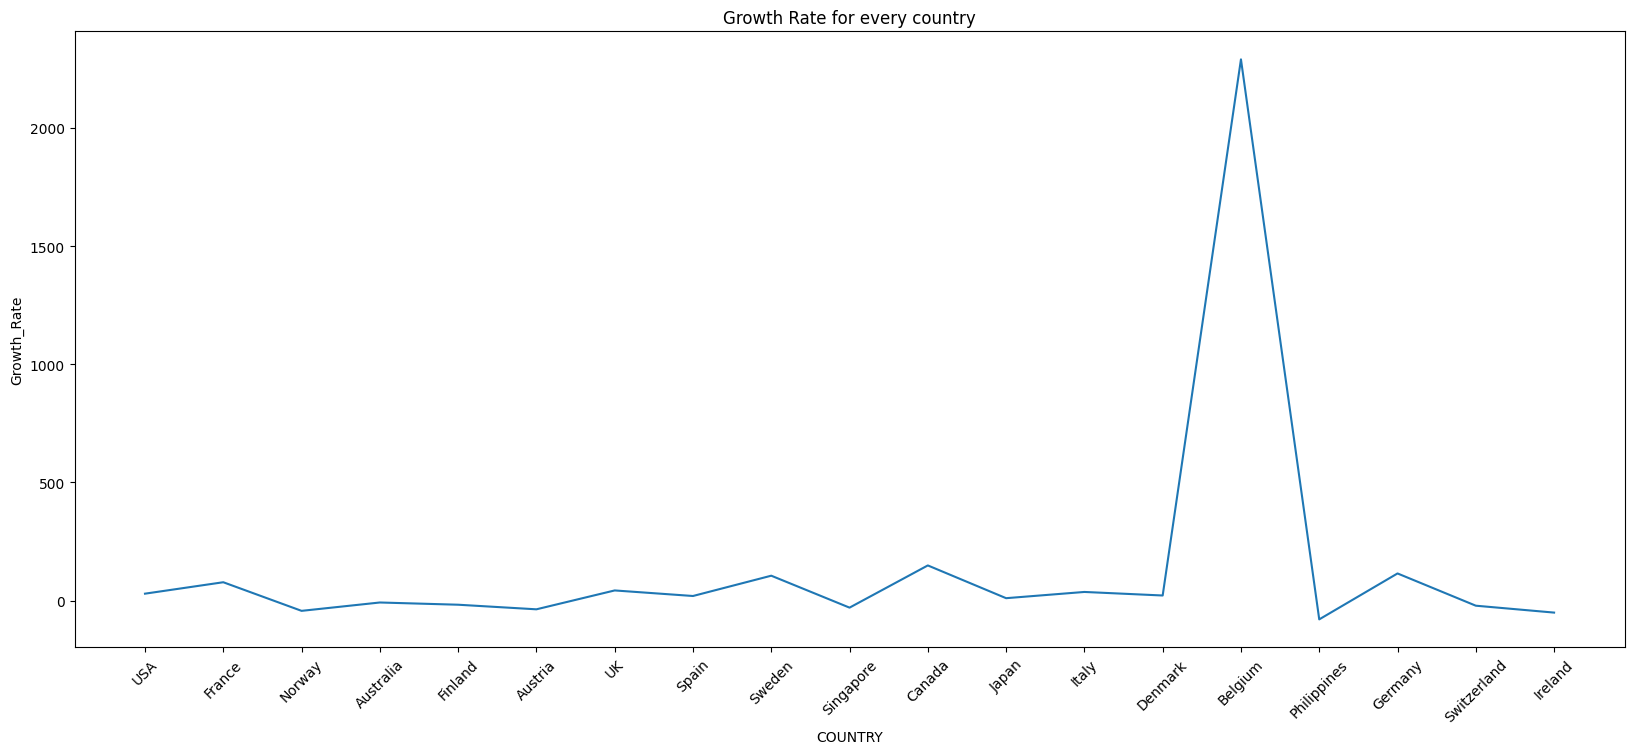

In [22]:
plt.figure(figsize=(20,8))
sns.lineplot(data=temp, x="COUNTRY", y="Growth_Rate")
plt.title('Growth Rate for every country')
plt.xticks(rotation=45)

##### Belgium had the most sales growth among others.

### Q5. Which Item Had Sold The Most in 2004? <a class="anchor" id="q5"></a>

In [23]:
df5 = df['PRODUCTLINE'][df['YEAR_ID'] == 2004].value_counts().reset_index()
df5.head()

,PRODUCTLINE,count
0,Classic Cars,442
1,Vintage Cars,284
2,Motorcycles,164
3,Planes,161
4,Trucks and Buses,142


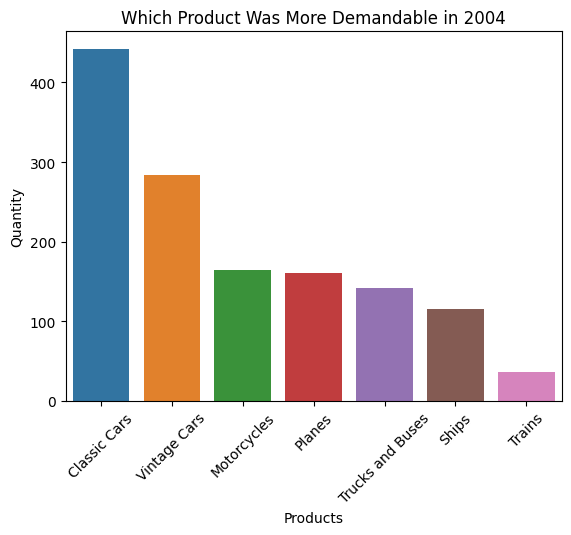

In [24]:
sns.barplot(data=df5, y='count', x='PRODUCTLINE')
plt.title('Which Product Was More Demandable in 2004')
plt.ylabel('Quantity')
plt.xlabel('Products')
plt.xticks(rotation=45, size=10)
plt.show()

### Q6. Which Item Had Sold The Most in 2003? <a class="anchor" id="q6"></a>

In [25]:
df6 = df['PRODUCTLINE'][df['YEAR_ID'] == 2003].value_counts().reset_index()
df6.head()

,PRODUCTLINE,count
0,Classic Cars,366
1,Vintage Cars,221
2,Trucks and Buses,110
3,Motorcycles,109
4,Planes,85


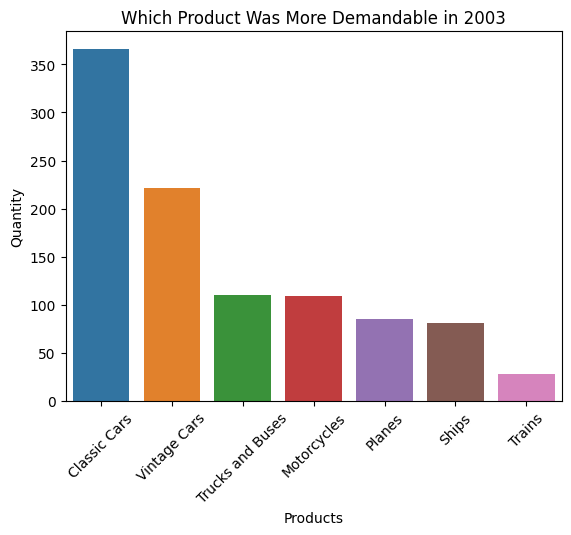

In [26]:
sns.barplot(data=df6, y='count', x='PRODUCTLINE')
plt.title('Which Product Was More Demandable in 2003')
plt.ylabel('Quantity')
plt.xlabel('Products')
plt.xticks(rotation=45, size=10)
plt.show()

### Q7. Who are the top 20% Customer? <a class="anchor" id="q7"></a>

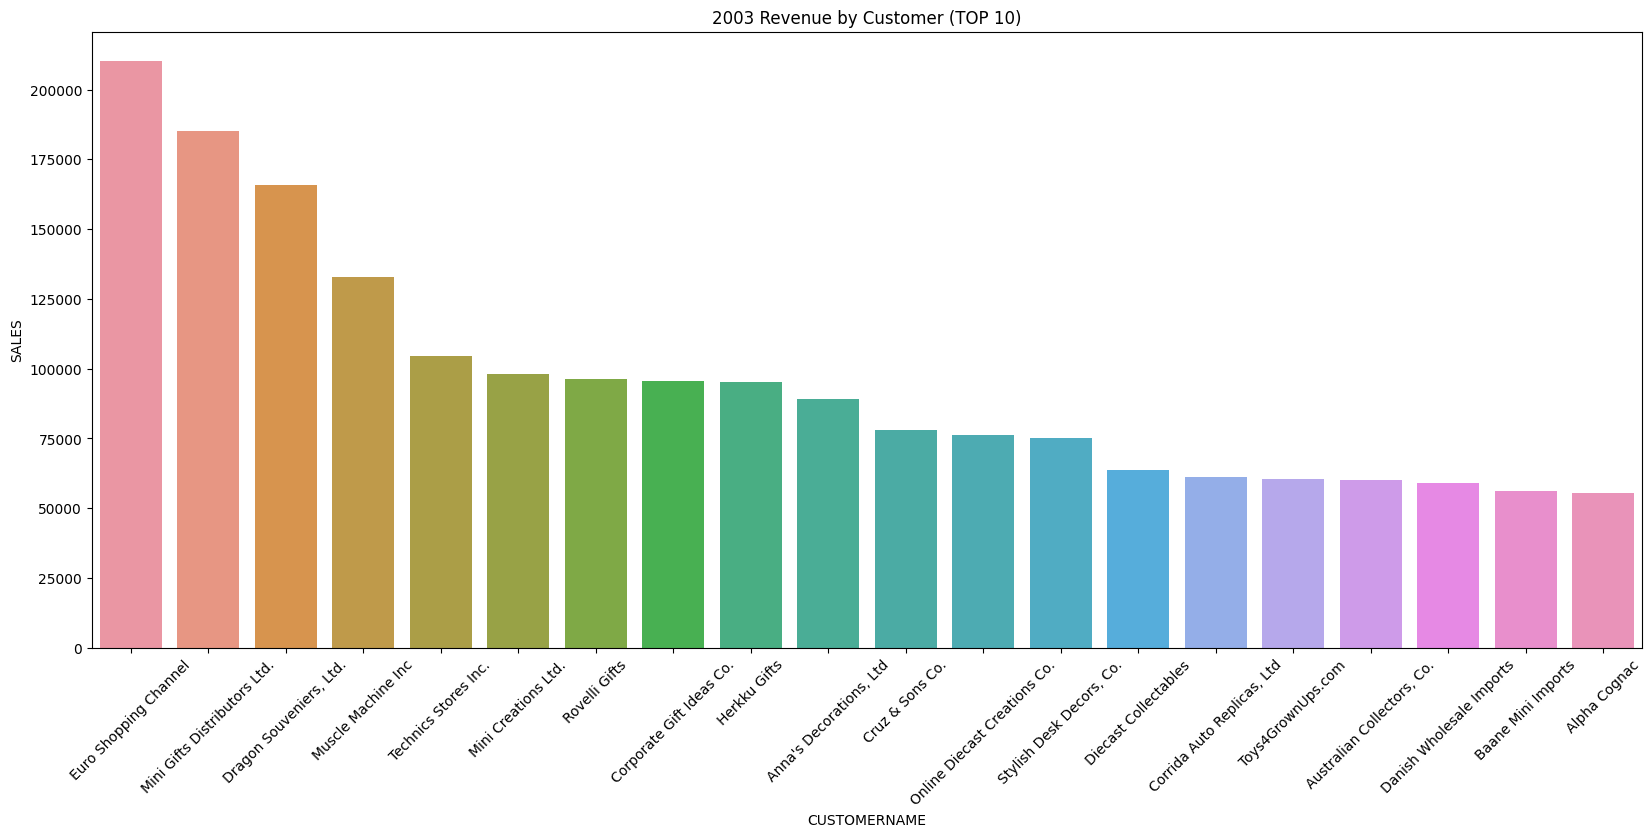

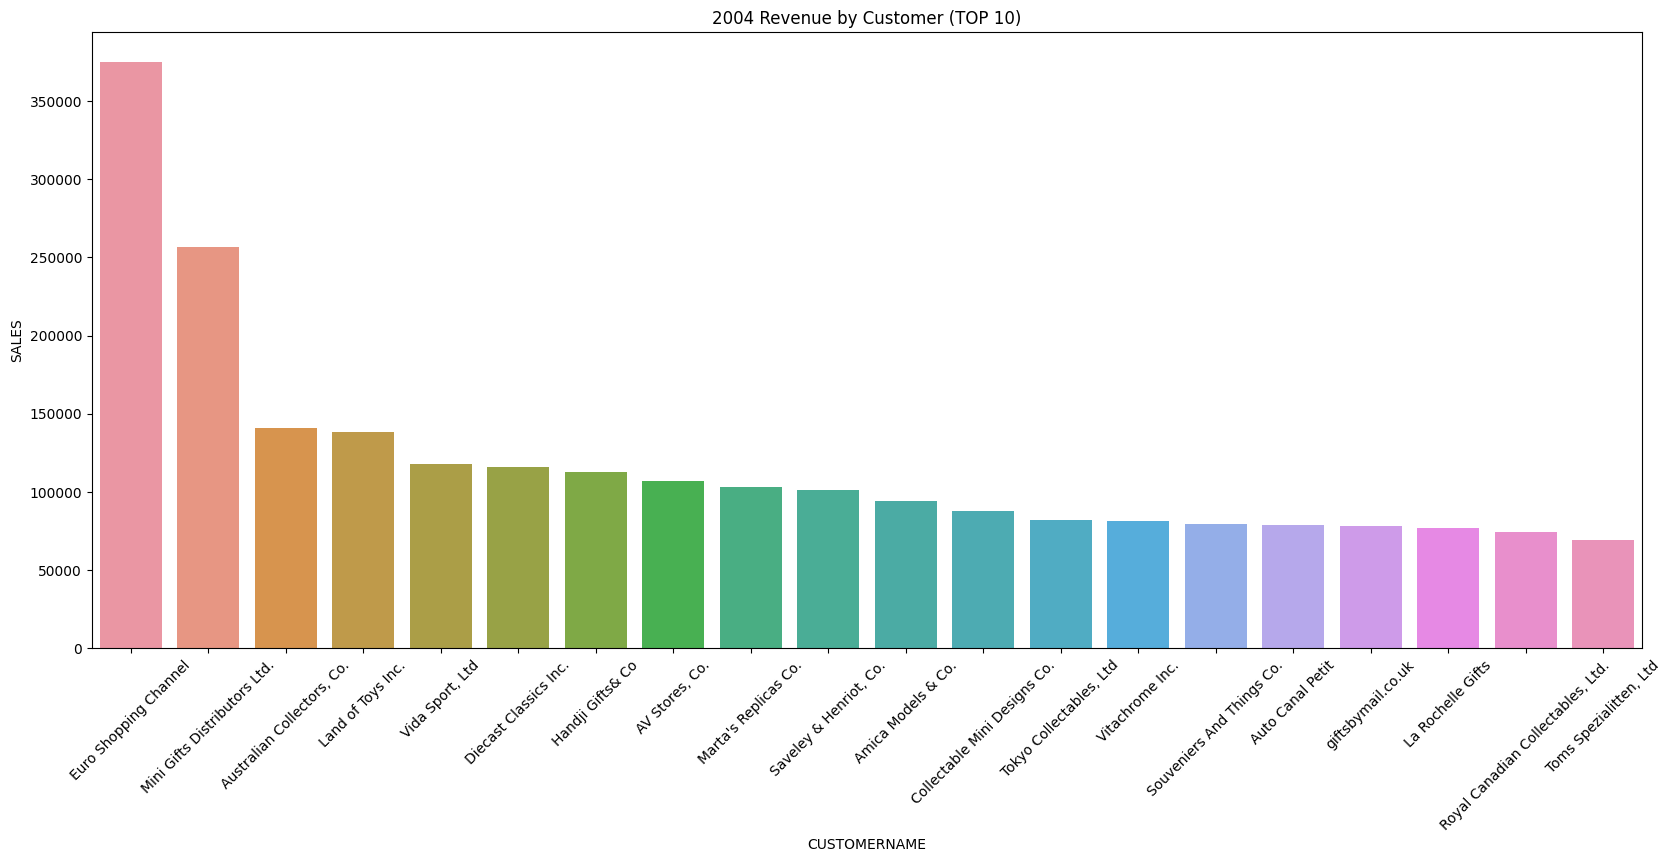

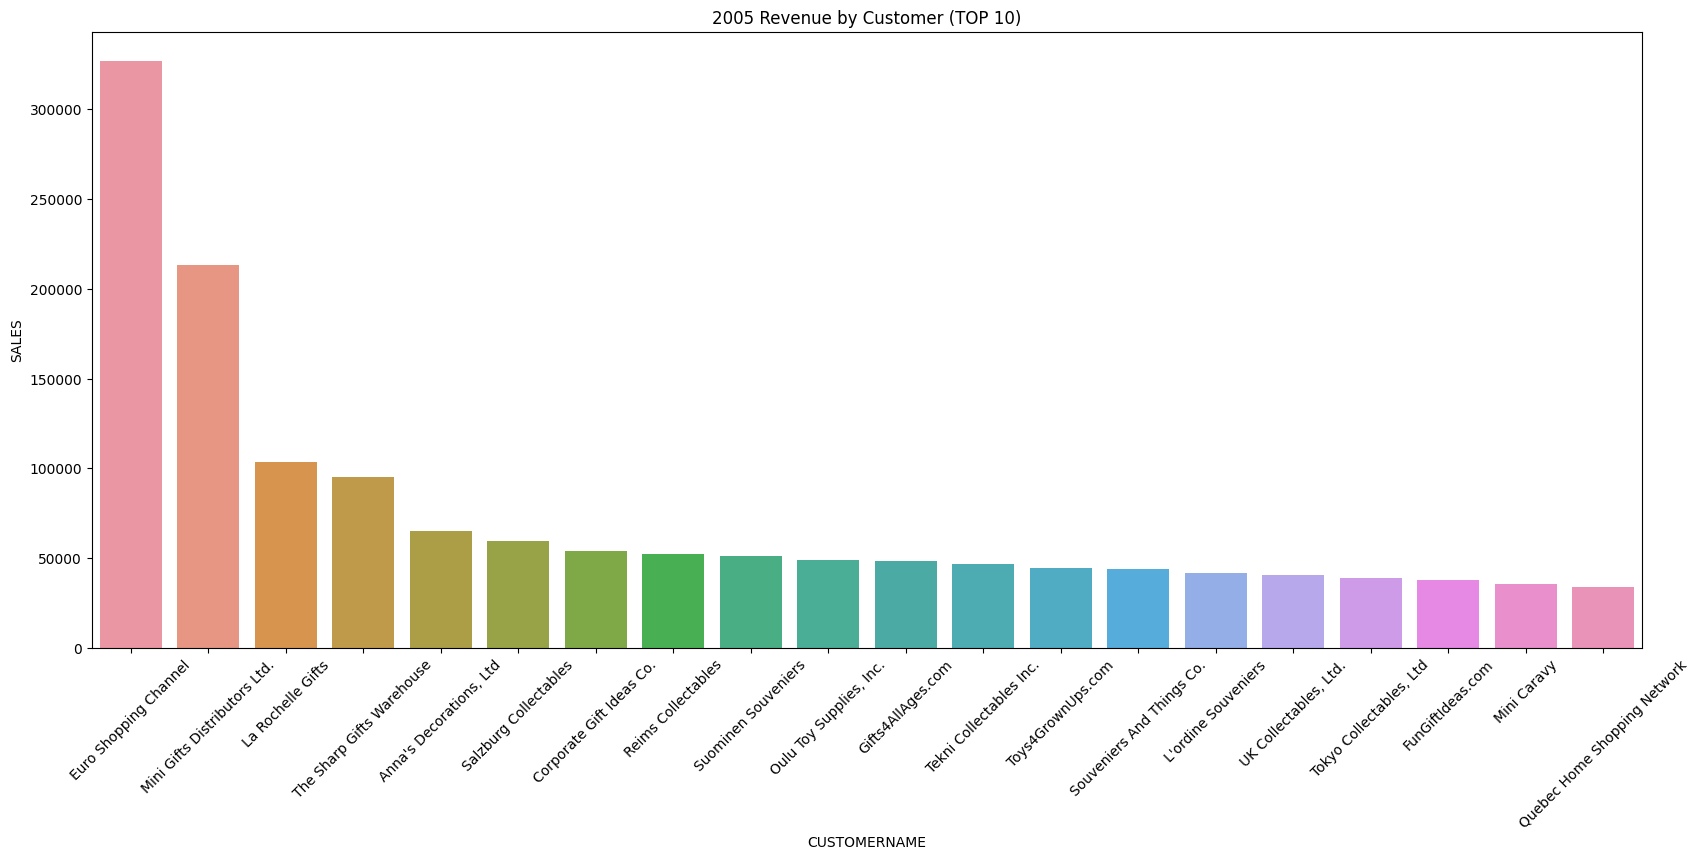

In [27]:
unique_years = df['YEAR_ID'].unique()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
    year_data['YEAR_ID'] = year
    plt.figure(figsize=(20,8))
    plt.title(str(year)+" Revenue by Customer (TOP 10)") # add title 
    year_data =year_data.sort_values(by = "SALES", ascending=False)
    year_data=year_data.head(20)
    a= sns.barplot(x='CUSTOMERNAME',y='SALES',data=year_data,errorbar=None)
    plt.xticks(rotation = 45)
    plt.show()

### Q8. Which Amount of Revenue is Contributed by The Top 20% of Customers? <a class="anchor" id="q8"></a>

In [28]:
unique_years = df['YEAR_ID'].unique()
temp2003=pd.DataFrame()
temp2004=pd.DataFrame()
temp2005=pd.DataFrame()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).reset_index()
    year_data['YEAR_ID'] = year
    if(year == 2003):
        temp2003 = year_data
    elif(year == 2004):
        temp2004 = year_data
    else:
        temp2005 = year_data
label = ['Top 20%', 'Others']

In [29]:
temp2003['revenue_cum'] = temp2003['SALES'].cumsum()
temp2003['%revenue_cum'] = temp2003['revenue_cum']/temp2003['SALES'].sum()
n=int(0.20*len(temp2003.index))
temp2003.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,210227.58,2003,210227.58,0.059775
1,Mini Gifts Distributors Ltd.,185128.12,2003,395355.70,0.112413
2,"Dragon Souveniers, Ltd.",165686.20,2003,561041.90,0.159524
3,Muscle Machine Inc,132778.24,2003,693820.14,0.197277
4,Technics Stores Inc.,104337.30,2003,798157.44,0.226944
5,Mini Creations Ltd.,97929.83,2003,896087.27,0.254789
6,Rovelli Gifts,96259.03,2003,992346.30,0.282159
7,Corporate Gift Ideas Co.,95678.88,2003,1088025.18,0.309364
8,Herkku Gifts,95277.18,2003,1183302.36,0.336454
9,"Anna's Decorations, Ltd",88983.71,2003,1272286.07,0.361755


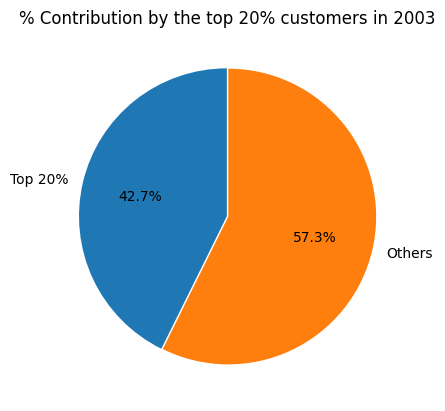

In [30]:
data = [(temp2003.head(n)['%revenue_cum'].max())*100, (1-temp2003.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% Contribution by the top 20% customers in 2003')
plt.show()

In [31]:
temp2004['revenue_cum'] = temp2004['SALES'].cumsum()
temp2004['%revenue_cum'] = temp2004['revenue_cum']/temp2004['SALES'].sum()
n=int(0.20*len(temp2004.index))
temp2004.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,375268.36,2004,375268.36,0.079436
1,Mini Gifts Distributors Ltd.,256474.26,2004,631742.62,0.133726
2,"Australian Collectors, Co.",140859.57,2004,772602.19,0.163543
3,Land of Toys Inc.,138285.68,2004,910887.87,0.192815
4,"Vida Sport, Ltd",117713.56,2004,1028601.43,0.217732
5,Diecast Classics Inc.,115971.34,2004,1144572.77,0.242281
6,Handji Gifts& Co,112911.15,2004,1257483.92,0.266181
7,"AV Stores, Co.",106789.89,2004,1364273.81,0.288786
8,Marta's Replicas Co.,103080.38,2004,1467354.19,0.310606
9,"Saveley & Henriot, Co.",101339.14,2004,1568693.33,0.332057


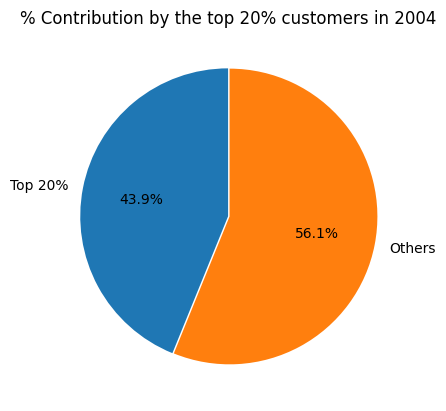

In [32]:
data = [(temp2004.head(n)['%revenue_cum'].max())*100, (1-temp2004.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% Contribution by the top 20% customers in 2004')
plt.show()

In [33]:
temp2005['revenue_cum'] = temp2005['SALES'].cumsum()
temp2005['%revenue_cum'] = temp2005['revenue_cum']/temp2005['SALES'].sum()
n=int(0.20*len(temp2005.index))
temp2005.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,326798.17,2005,326798.17,0.182417
1,Mini Gifts Distributors Ltd.,213255.68,2005,540053.85,0.301456
2,La Rochelle Gifts,103402.09,2005,643455.94,0.359174
3,The Sharp Gifts Warehouse,95409.93,2005,738865.87,0.412432
4,"Anna's Decorations, Ltd",65012.42,2005,803878.29,0.448721
5,Salzburg Collectables,59475.10,2005,863353.39,0.481920
6,Corporate Gift Ideas Co.,54203.62,2005,917557.01,0.512176
7,Reims Collectables,52029.07,2005,969586.08,0.541219


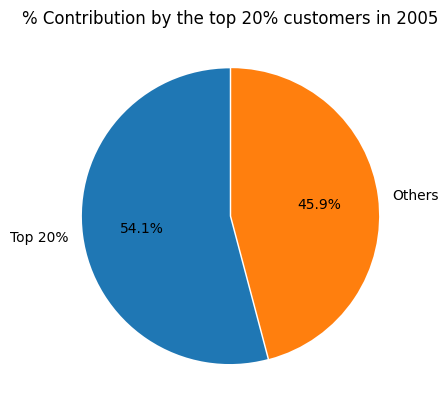

In [34]:
data = [(temp2005.head(n)['%revenue_cum'].max())*100, (1-temp2005.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% Contribution by the top 20% customers in 2005')
plt.show()